0.9932  accuracy per iteration of k fold 
0.9987  accuracy per iteration of k fold 
0.9997  accuracy per iteration of k fold 
0.999  accuracy per iteration of k fold 
0.9994  accuracy per iteration of k fold 
0.9996  accuracy per iteration of k fold 
0.9997  accuracy per iteration of k fold 
0.9995  accuracy per iteration of k fold 
1.0  accuracy per iteration of k fold 
0.9995999599959996  accuracy per iteration of k fold 
Accuracy of stratified k fold : 0.5618
[SPLIT 1]
Accuracy of stratified k fold : 0.9988
[SPLIT 2]
Accuracy of stratified k fold : 0.9988
[SPLIT 3]
Accuracy of stratified k fold : 0.9988
[SPLIT 4]
Accuracy of stratified k fold : 0.9988
[SPLIT 5]
Accuracy of stratified k fold : 0.9988
[SPLIT 6]
Accuracy of stratified k fold : 0.9988
[SPLIT 7]
Accuracy of stratified k fold : 0.9988
[SPLIT 8]
Accuracy of stratified k fold : 0.9988
[SPLIT 9]
confusion matrix : 
[[19974     2]
 [   24     0]]
accuracy score  0.9987


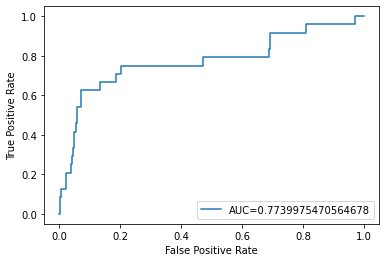

In [4]:
# -*- coding: utf-8 -*-



"""
Created on Thu Jun  5 15:20:20 2022

@author: Mostafa


"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn import metrics




data = pd.read_csv("datafinal.csv")


data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})#string to integers

data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
X=data.drop('isFraud',axis=1)
y=data['isFraud']
for i in range(1,7):
    max_X=max(X.iloc[:,i])
    min_X=min(X.iloc[:,i])
    X.iloc[:,i]=(X.iloc[:,i]-min_X)/(max_X-min_X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)

y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1  
y_train_new=pd.DataFrame(y_train_new)
Y_cv_new=np.zeros(len(Y_cv))
for i in range (len(Y_cv)):
    if Y_cv.iloc[i] == 'Fraud':
        Y_cv_new[i] =1  
Y_test_new_1=np.zeros(len(Y_cv))
for i in range (len(Y_test_new)):
    if Y_test_new.iloc[i] == 'Fraud':
        Y_test_new_1[i] =1

def generateXvector(X):#add coloumn of 1 in X features
   
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def theta_init(X):
   
    theta = np.random.randn(X+1, 1)
    return theta

def sigmoid_function(X):
  
    return 1/(1+math.e**(-X))

def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 
        cost_lst.append(cost_value)
        
    
    return theta, cost_value

theta1, cost_value1=Logistics_Regression(X_train,y_train_new,0.03, 100)

def root_regularization(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    cost_lst = []
    N = len(y_test)
    for l in range(np.size(lamda)):
        term=(lamda[l]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[l]
    return best_lamda,cost_reg

def rmse(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

cost_cv=100
theta1_cv=[]

for j in range(9):#cross validation
    vectorX=generateXvector(X_cv.iloc[:,0:j])
    theta2, cost_value1=Logistics_Regression(X_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,Y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2

y_pred_test=sigmoid_function(np.dot(X_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_Y_test=rmse(y_pred_test,Y_test_new_1)
cost_test_reg=rmse(y_pred_test,Y_test_new_1)+(best_lamda/2*len(Y_cv))*(np.sum(theta1_cv**2))


##K fold
skfolds = KFold(n_splits=10)
splits = skfolds.split(X, y)
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data  
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print(accuracy,' accuracy per iteration of k fold ')
##stratified

skfolds_1 = StratifiedKFold(n_splits=9)
splits_1 = skfolds_1.split(X, y)
for i, (train_index, test_index) in enumerate(splits_1): #split and shuffle the data 
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  print("Accuracy of stratified k fold : %.4f"%accuracy)
  print("[SPLIT %d]"%(i+1))

#conv matrix
print("confusion matrix : ")
print(sklearn.metrics.confusion_matrix(Y_test_new_1,np.round((y_pred_test))))
print('accuracy score ',accuracy_score(Y_test_new_1, np.round((y_pred_test))) )
##

fpr, tpr, _ = metrics.roc_curve(Y_test_new_1,  y_pred_test)#represents the relation between TP and FP
auc = metrics.roc_auc_score(Y_test_new_1, y_pred_test)

#create ROC curve
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()